In [1]:
# Import analysis libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Instacart prepared data from 4.9 task
df = pd.read_pickle(r'/Users/jlsanabria77/Desktop/17-02.2021 Instacat Basket Analysis 3/02 Data/Prepared Data/ords_prods_merged88.pkl')

In [5]:
# Check column names
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,...,spend_flag,median_ordering,frequency_flag,STATE,Age,date_joined,number_of_dependants,family_status,annual_income,_merge
0,2539329,1,1,2,8,NaN,196,Soda,7,9,...,Low Spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,Soda,7,9,...,Low Spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,Soda,7,9,...,Low Spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,Soda,7,9,...,Low Spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,Soda,7,9,...,Low Spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,both


# 2. Security Implications.

This Instacart database had a number of columns which could have security implications. Those columns were First name, Last name and Gendre. The columns are not longer in this dataframe becasue they were eliminated to be able to reduce the size and the time used to load, export, merge... So at this point there is no need to alter the dataframe any more.



# 3. Comparing customer behavior in different geographic areas.

In [32]:
# Create a "Region" column to group customers by geographic area.

In [6]:
# Check all values in the 'State' column
df['STATE'].value_counts(dropna = False)

New York                362103
Arkansas                349025
Wyoming                 348522
Alabama                 346246
North Dakota            346049
Minnesota               345774
Montana                 344374
Maine                   342816
New Hampshire           342248
Pennsylvania            341213
California              340880
Virginia                340811
Rhode Island            340134
Michigan                339765
Maryland                339560
Indiana                 339158
Louisiana               338693
North Carolina          337566
Kentucky                336700
Mississippi             336640
Kansas                  336499
South Carolina          335591
Tennessee               335550
Iowa                    335526
New Jersey              335242
Massachusetts           333743
Illinois                332105
Arizona                 331672
Oklahoma                331026
Connecticut             331007
Washington              330787
New Mexico              330058
Hawaii  

In [8]:
# Create “Region” column based on “State” column using For-loop

result = []

for value in df ["STATE"]:
    if (value == "Maine" or value =="New Hampshire" or value =="Vermont" or value =="Massachusetts" or value =="Rhode Island" or value =="Connecticut" or value =="New York" or value =="Pennsylvania" or value =="New Jersey"):
        result.append("Northeast")
    elif (value == "Wisconsin" or value =="Michigan" or value=="Illinois" or value=="Indiana" or value=="Ohio" or value=="North Dakota" or value=="South Dakota" or value=="Nebraska" or value=="Kansas" or value=="Minnesota" or value=="Iowa" or value=="Missouri"):
        result.append("Midwest")
    elif (value == "Delaware" or value == "Maryland" or value== "District of Columbia" or value== "Virginia" or value== "West Virginia" or value== "North Carolina" or value== "South Carolina" or value== "Georgia" or value== "Florida" or value== "Kentucky" or value== "Tennessee" or value== "Mississippi" or value== "Alabama" or value== "Oklahoma" or value== "Texas" or value== "Arkansas" or value== "Louisiana"):
        result.append("South")
    elif (value == "Idaho" or value == "Montana" or value== "Wyoming" or value== "Nevada" or value== "Utah" or value== "Colorado" or value== "Arizona" or value== "New Mexico" or value== "Alaska" or value== "Washington" or value== "Oregon" or value== "California" or value== "Hawaii"):
        result.append("West")
    else:
        result.append("N/A")

In [10]:
#  Check results for the new column
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',


In [11]:
# Create 'US_Region' column in df using result

df['US_Region'] = result

In [12]:
# Print frequency new column

df['US_Region'].value_counts(dropna=False)

South        5681692
West         4296663
Midwest      3997298
Northeast    3051876
Name: US_Region, dtype: int64

In [13]:
# Difference in spending habits between US regions by crossing Region variable with Spending Flag

crosstab = pd.crosstab(df['US_Region'], df['spend_flag'], dropna = False)

In [14]:
# Copy crosstab to clipboard to be able to past into Excel

crosstab.to_clipboard()

In [15]:
# Let's check the results

crosstab

spend_flag,High Spender,Low Spender
US_Region,,
Midwest,72532,3924766
Northeast,58562,2993314
South,113861,5567831
West,87340,4209323


The South has the highest number of customers for Instacart. In both groups (High and Low Spender) the South makes the most customers for this company. 

### Spending Habits analysis

By looking at statistics from the most relevant coulmns based on the four regions we can analyze how those regions behave

In [17]:
# 1st Statistics for Prices

df.groupby(['US_Region']).agg({'prices':['median']})

,prices
,median
US_Region,
Midwest,7
Northeast,7
South,7
West,7


All four regions have the same average of prices paid by customers


In [24]:
# 2nd Statistics for number of orders

df.groupby(['US_Region']).agg({'order_number':['mean']})

,order_number
,mean
US_Region,
Midwest,17.149351
Northeast,17.394756
South,17.296798
West,17.052125


The region with the highest average of number of orders is the Northeast. So altohugh the South has more orders total, the NW customers order more on average. 

In [26]:
# 3rd Statistics for hour of the day

df.groupby(['US_Region']).agg({'order_hour_of_day':['median']})

,order_hour_of_day
,median
US_Region,
Midwest,13
Northeast,13
South,13
West,13


In all four regions the hour when customers place the most orders is 13 (1pm). (No difference between regions)

In [27]:
# 4th Statistics for days since prior order

df.groupby(['US_Region']).agg({'days_since_prior_order':['median']})

,days_since_prior_order
,median
US_Region,
Midwest,8.0
Northeast,8.0
South,8.0
West,8.0


In all ofur regions the number of days from the previous orders is 8. (No difference between regions).

### All four regions have the same statistcs in terms of customer behaviour. The only difference between regions is on the average of number of orders where the Northeast customer has the highest average of number of orders.

# 4. Create Exclusion flag for Low-activity customers

In [28]:
# 1st we create 2 statements

df.loc[df['order_number'] <5,'Activity_Flag'] = 'Low_Activity'

In [29]:
df.loc[df['order_number'] >=5,'Activity_Flag'] = 'High_Activity'

In [31]:
# Print frequency of new column 'Activity_Flag'

df['Activity_Flag'].value_counts(dropna = False)

High_Activity    12845909
Low_Activity      4181620
Name: Activity_Flag, dtype: int64

In [32]:
# Make sure the sum of both values equal the total number of values

df.shape

(17027529, 28)

In [34]:
# Creare a sample dataframe with only low activity customers

df_low_activity = df[df.Activity_Flag == 'Low_Activity']

In [36]:
# Export low activity dataframe

df_low_activity.to_pickle(r'/Users/jlsanabria77/Desktop/17-02.2021 Instacat Basket Analysis 3/02 Data/Prepared Data/df_low_activity_task_10.P1.pkl')

In [37]:
# Update DF with High Actvity Customers only

df = df[df.Activity_Flag == 'High_Activity']

In [38]:
# Check number of variables left with High_Activity match

df.shape

(12845909, 28)

In [40]:
# Export new sample with High_Activity values only

df.to_pickle(r'/Users/jlsanabria77/Desktop/17-02.2021 Instacat Basket Analysis 3/02 Data/Prepared Data/df_high_activity_task_10.P1.pkl')

# 5. Customer Profiling

We create profiling variables based age, income, pet article buyers and number of dependants. 

In [44]:
# We create an Age flag to group customers by range of age.

df['Age'] = df.groupby(['user_id'])['Age'].transform('max')

<ipython-input-44-25ba90264445>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df.groupby(['user_id'])['Age'].transform('max')


In [45]:
df.loc[df['Age']<30, 'Age_Profile'] = 'Young'

/Users/jlsanabria77/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jlsanabria77/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [48]:
df.loc[(df['Age']<50) & (df['Age']>=30), 'Age_Profile']= 'Middle Age'

In [50]:
df.loc[(df['Age']<70) & (df['Age']>=50), 'Age_Profile']= 'Mature Age'

In [51]:
df.loc[df['Age']>=70, 'Age_Profile']= 'Elderly'

In [52]:
df['Age_Profile'].value_counts(dropna = False)

Middle Age    4016885
Mature Age    3972623
Young         2435154
Elderly       2421247
Name: Age_Profile, dtype: int64

In [53]:
# Crosstab of age 
Age = pd.crosstab(df['user_id'],df['Age_Profile'], dropna = False)

In [54]:
Age

Age_Profile,Elderly,Mature Age,Middle Age,Young
user_id,,,,
1,0,0,129,0
2,0,748,0,0
3,0,0,211,0
4,0,0,44,0
5,836,0,0,0
...,...,...,...,...
32763,70,0,0,0
32764,0,154,0,0
32765,0,722,0,0


In [55]:
# We copy crosstab to clipboard to past to Excel
Age.to_clipboard()

In [6]:
# We create an 'income' flag to group cusotmers by income
df['annual_income'] = df.groupby(['user_id'])['annual_income'].transform('max')

In [7]:
df['annual_income'].describe()

count    1.702753e+07
mean     9.559233e+04
std      4.266695e+04
min      2.598600e+04
25%      6.182100e+04
50%      9.408200e+04
75%      1.248140e+05
max      5.768760e+05
Name: annual_income, dtype: float64

In [8]:
df['income_category'] = df.groupby(['user_id'])['annual_income'].transform('max')

In [9]:
df.loc[df['income_category']<=61952, 'income_flag']= 'Low Income'

In [10]:
df.loc[(df['income_category']<124774) & (df['income_category']>61952),'income_flag']= 'Medium Income'

In [11]:
df.loc[df['income_category']>=124774, 'income_flag']= 'High Income'

In [12]:
df['income_flag'].value_counts(dropna = False)

Medium Income    8496829
Low Income       4269392
High Income      4261308
Name: income_flag, dtype: int64

In [80]:
# Crosstab of wealth
wealth =pd.crosstab(df['user_id'], df['income_flag'], dropna=False )

In [81]:
wealth

income_flag,High Income,Low Income,Medium Income
user_id,,,
1,0,129,0
2,0,0,748
3,0,0,211
4,0,44,0
5,0,0,836
...,...,...,...
32763,0,70,0
32764,0,154,0
32765,722,0,0


In [82]:
# Transfer to clipboard so we can export to Excel
wealth.to_clipboard()

In [83]:
wealth

income_flag,High Income,Low Income,Medium Income
user_id,,,
1,0,129,0
2,0,0,748
3,0,0,211
4,0,44,0
5,0,0,836
...,...,...,...
32763,0,70,0
32764,0,154,0
32765,722,0,0


In [88]:
# We create a Pet Product Order flag amd a pet owner column

df ['Pet Product Order Flag']=""

In [95]:
df.loc[(df['department_id'] == 8), 'Pet Product Order Flag'] = 1

In [96]:
df.loc[(df['department_id'] != 8), 'Pet Product Order Flag'] = 0

In [97]:
df['Pet Product Order Flag'].value_counts(dropna=False)

0    12807629
1       38280
Name: Pet Product Order Flag, dtype: int64

In [101]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,...,number_of_dependants,family_status,annual_income,_merge,US_Region,Activity_Flag,Age_Profile,income_category,income_flag,Pet Product Order Flag
4,431534,1,5,4,15,28.0,196,Soda,7,9,...,3,married,40423,both,South,High_Activity,Middle Age,40423,Low Income,0
5,3367565,1,6,2,7,19.0,196,Soda,7,9,...,3,married,40423,both,South,High_Activity,Middle Age,40423,Low Income,0
6,550135,1,7,1,9,20.0,196,Soda,7,9,...,3,married,40423,both,South,High_Activity,Middle Age,40423,Low Income,0
7,3108588,1,8,1,14,14.0,196,Soda,7,9,...,3,married,40423,both,South,High_Activity,Middle Age,40423,Low Income,0
8,2295261,1,9,1,16,0.0,196,Soda,7,9,...,3,married,40423,both,South,High_Activity,Middle Age,40423,Low Income,0


In [124]:
# Create a Pet Owner Column by customers who order from department number 8 (pet products

df['Pet Owner'] = ""

In [14]:
# 1 or more orders from department eight means pet owner.
# zero orders from department eight means no pet owner.

df.loc[(df['Pet Product Order Flag'] >= 1), 'Pet Owner'] = "Pet Owner"

In [15]:
df.loc[(df['Pet Product Order Flag'] == 0), 'Pet Owner'] = "No Pet Owner"

In [16]:
df['Pet Owner'].value_counts(dropna=False)

No Pet Owner    12807629
Pet Owner          38280
Name: Pet Owner, dtype: int64

In [127]:
# Create a Dependancy Status

df['Dependancy_Status']=""

In [128]:
df.loc[((df['Age'] >= 18) & (df['Age'] <= 30) & (df['number_of_dependants'] >= 1)), 'Dependancy_Status'] = 'Young Parent'

In [129]:
df.loc[((df['Age'] >= 30) & (df['Age'] <= 50) & (df['number_of_dependants'] >= 1)), 'Dependancy_Status'] = 'Mature Parent'

In [130]:
df.loc[((df['Age'] >= 50) & (df['number_of_dependants'] >= 1)), 'Dependancy_Status'] = 'Elderly Parent'

In [131]:
df.loc[(df ['number_of_dependants'] == 0), 'Dependancy_Status'] = 'No Dependants'

In [132]:
# Check values from new column

df['Dependancy_Status'].value_counts(dropna=False)

Elderly Parent    4812617
No Dependants     3180911
Mature Parent     3012876
Young Parent      1839505
Name: Dependancy_Status, dtype: int64

In [33]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,...,Activity_Flag,Age_Profile,income_category,income_flag,Pet Product Order Flag,Pet owner,Pet Owner,Dependancy Status,Dependancy_Status,Parent_Status
4,431534,1,5,4,15,28.0,196,Soda,7,9,...,High_Activity,Middle Age,40423,Low Income,0,,No Pet Owner,,Mature Parent,NaN
5,3367565,1,6,2,7,19.0,196,Soda,7,9,...,High_Activity,Middle Age,40423,Low Income,0,,No Pet Owner,,Mature Parent,NaN
6,550135,1,7,1,9,20.0,196,Soda,7,9,...,High_Activity,Middle Age,40423,Low Income,0,,No Pet Owner,,Mature Parent,NaN
7,3108588,1,8,1,14,14.0,196,Soda,7,9,...,High_Activity,Middle Age,40423,Low Income,0,,No Pet Owner,,Mature Parent,NaN
8,2295261,1,9,1,16,0.0,196,Soda,7,9,...,High_Activity,Middle Age,40423,Low Income,0,,No Pet Owner,,Mature Parent,NaN


In [134]:
# Export DF to continue later

df.to_pickle(r'/Users/jlsanabria77/Desktop/17-02.2021 Instacat Basket Analysis 3/02 Data/Prepared Data/ords_prods_Final_Task.pkl')

# 6. Visualization for distribution profiles

In [3]:
# Import main dataframe to continue exercise

df = pd.read_pickle(r'/Users/jlsanabria77/Desktop/17-02.2021 Instacat Basket Analysis 3/02 Data/Prepared Data/ords_prods_Final_Task.pkl')

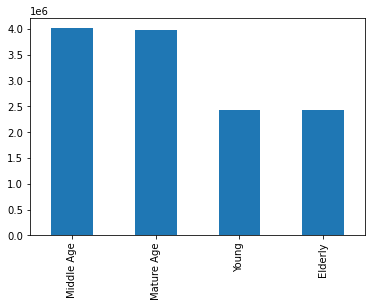

In [6]:
# 1st visualization for profile distribution (Age)
Age_bar = df['Age_Profile'].value_counts().plot.bar()

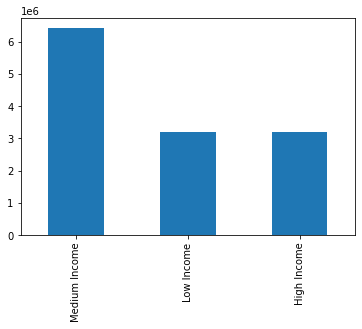

In [11]:
# 2nd visualzation for profile distribution (Wealth)
wealth_bar = df['income_flag'].value_counts().plot.bar()

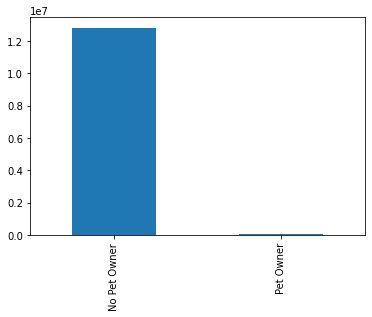

In [18]:
# 3rd visualization for profile distribution (Wealth)
Pet_bar = df['Pet Owner'].value_counts().plot.bar()

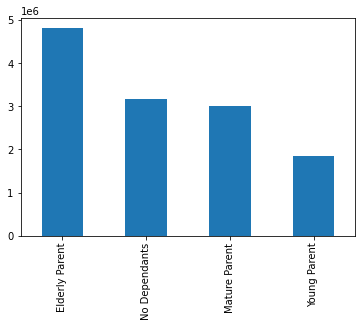

In [20]:
# 4th visualization for profile distribution (Dependancy)
Dependancy_bar = df['Dependancy_Status'].value_counts().plot.bar()

# 7. Aggregate max, mean & min variables

In [34]:
df.groupby('Age_Profile').agg({'annual_income':['mean', 'min', 'max']})

annual_income               
                      mean    min     max
Age_Profile                              
Elderly      112013.678768  29105  576876
Mature Age   110674.178760  29057  552776
Middle Age    87575.676753  25986  569810
Young         68134.018044  26116  391834

The oldest group is the one with the highest income

In [45]:
df.groupby('Age_Profile').agg({'order_hour_of_day':['mean', 'min', 'max']})

order_hour_of_day        
                         mean min max
Age_Profile                          
Elderly             13.373445   0  23
Mature Age          13.382942   0  23
Middle Age          13.386389   0  23
Young               13.311787   0  23

The Mature age group is the one who order later in the day although the difference is minimal

In [37]:
df.groupby('Pet Owner').agg({'annual_income':['mean', 'min', 'max']})

annual_income               
                      mean    min     max
Pet Owner                                
No Pet Owner  95642.025443  25986  576876
Pet Owner     94833.906270  26234  553569

Pet owners have higher income than non-pet-owners

In [46]:
df.groupby('Pet Owner').agg({'Age':['mean', 'min', 'max']})

Age        
                   mean min max
Pet Owner                      
No Pet Owner  49.428237  18  81
Pet Owner     49.502821  18  81

Pet Owners are slightly older than non-pet-owners

In [39]:
df.groupby('Dependancy_Status').agg({'annual_income':['mean', 'min', 'max']})

annual_income               
                            mean    min     max
Dependancy_Status                              
Elderly Parent     111113.978236  29074  552776
Mature Parent       87652.112923  25986  553569
No Dependants       95692.744169  26116  576876
Young Parent        68145.370682  26119  391834

Elderly Parent group has the highest income

In [42]:
df.groupby('Dependancy_Status').agg({'order_day_of_week':['mean', 'min', 'max']})

order_day_of_week        
                               mean min max
Dependancy_Status                          
Elderly Parent             2.756239   0   6
Mature Parent              2.742191   0   6
No Dependants              2.754131   0   6
Young Parent               2.749292   0   6

Tuesday-Wednesday is when all four groups mostly shop

# 8. Compare customer profiles with regions and departments

In [48]:
# We create crosstabs with two variables
# 1st. Age by Region
crosstab_age_region=pd.crosstab(df['US_Region'],df['Age_Profile'], dropna = False )

In [49]:
crosstab_age_region

Age_Profile,Elderly,Mature Age,Middle Age,Young
US_Region,,,,
Midwest,558439,929758,952294,569807
Northeast,455877,727639,716340,411029
South,777025,1301518,1364658,845601
West,629906,1013708,983593,608717


Middle Age group (30-50) seems to be the largest in the Midwest and South regions while the Mature Age group (50-70)
is the largest for the Northeast and West regions.

In [50]:
crosstab_age_department=pd.crosstab(df['department_id'],df['Age_Profile'], dropna = False )

In [51]:
crosstab_age_department

Age_Profile,Elderly,Mature Age,Middle Age,Young
department_id,,,,
1,165549,263689,264010,159651
2,2478,4418,4323,3026
3,89092,142709,146723,87475
4,711360,1178807,1188435,726721
5,9604,16510,18361,11129
6,20198,31624,32937,19885
7,201392,333533,336841,196588
8,7186,11925,11675,7494
9,63029,102240,105078,62496


In [52]:
crosstab_income_region=pd.crosstab(df['US_Region'],df['income_flag'], dropna = False )

In [53]:
crosstab_income_region

income_flag,High Income,Low Income,Medium Income
US_Region,,,
Midwest,761543,782590,1466165
Northeast,588900,565251,1156734
South,1055497,1075050,2158255
West,805591,789060,1641273


In all four regions we can observe very similar figures. The number of citizens with Medium income seems to be equal to the sum citizens of High and Low income.

In [13]:
crosstab_income_department=pd.crosstab(df['department_id'],df['income_flag'], dropna = False )

In [57]:
crosstab_income_department

income_flag,High Income,Low Income,Medium Income
department_id,,,
1,217707,209972,425220
2,3254,3926,7065
3,118701,115156,232142
4,954392,931270,1919661
5,15154,13282,27168
6,26766,24888,52990
7,260262,280958,527134
8,9402,9462,19416
9,84530,79696,168617


In [58]:
crosstab_pet_region=pd.crosstab(df['US_Region'],df['Pet Owner'], dropna = False )

In [59]:
crosstab_pet_region

Pet Owner,No Pet Owner,Pet Owner
US_Region,,
Midwest,3000627,9671
Northeast,2303950,6935
South,4276743,12059
West,3226309,9615


The region with the largest ammont of pet onwers is the south and all four regions have a similar percentage of pet owners over the total population (between 0.28% to 0.32%)

In [60]:
crosstab_pet_department=pd.crosstab(df['department_id'],df['Pet Owner'], dropna = False )

In [61]:
crosstab_pet_department

Pet Owner,No Pet Owner,Pet Owner
department_id,,
1,852899,0
2,14245,0
3,465999,0
4,3805323,0
5,55604,0
6,104644,0
7,1068354,0
8,0,38280
9,332843,0


In [76]:
crosstab_Dependancy_region=pd.crosstab(df['US_Region'],df['Dependancy_Status'], dropna = False )

In [77]:
crosstab_Dependancy_region

Dependancy_Status,Elderly Parent,Mature Parent,No Dependants,Young Parent
US_Region,,,,
Midwest,1103580,705150,759829,441739
Northeast,887067,540460,579750,303608
South,1585667,1024049,1048984,630102
West,1236303,743217,792348,464056


The south shows the highest figures in all four regions as it is the most populated region in the country. We can also notice that four regions have the same distribution of Dependancy Status. Elderly Parents is the largest group follwed by People with No dependants, then the Mature Parents Group and finally young parents. They geographic variable is not a factor in this case.

In [63]:
crosstab_Dependancy_department=pd.crosstab(df['department_id'],df['Dependancy_Status'], dropna = False )

In [66]:
crosstab_Dependancy_department

Dependancy_Status,Elderly Parent,Mature Parent,No Dependants,Young Parent
department_id,,,,
1,322208,198904,211905,119882
2,5220,3232,3485,2308
3,175436,109267,115116,66180
4,1425837,894519,938079,546888
5,20355,13459,13211,8579
6,39160,24697,25823,14964
7,399267,250488,269583,149016
8,14284,8978,8973,6045
9,124336,77881,83726,46900


# 9. Charts to Illustrate results.

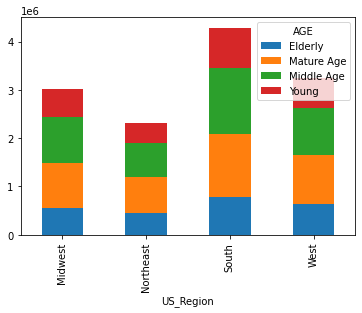

In [70]:
# Age and Region stacked bar
age_region_profile= crosstab_age_region.plot.bar(stacked= True)
plt.legend(title='AGE')

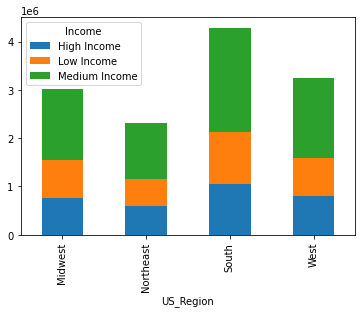

In [73]:
# Income and Region stacked bar
income_region_profile= crosstab_income_region.plot.bar(stacked= True)
plt.legend(title='Income')

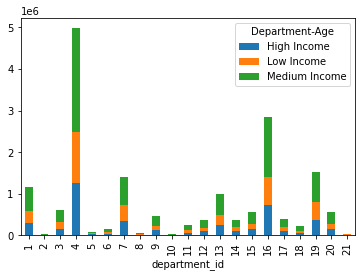

In [14]:
income_department_profile = crosstab_income_department.plot.bar(stacked = True)
plt.legend(title = 'Department-Age')

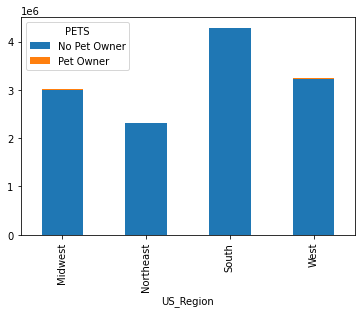

In [74]:
pet_region_profile= crosstab_pet_region.plot.bar(stacked= True)
plt.legend(title='PETS')

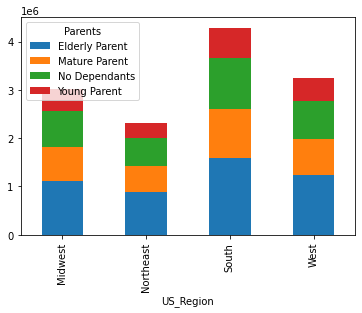

In [78]:
Dependancy_region_profile= crosstab_Dependancy_region.plot.bar(stacked= True)
plt.legend(title='Parents')

Export Charts to Project Folder

In [84]:
# Export Age bar chart
Age_bar.figure.savefig(r'/Users/jlsanabria77/Desktop/17-02.2021 Instacat Basket Analysis 3/04 Analysis/Visualizations/Age_bar.png')

In [86]:
# Export Wealth bar chart
wealth_bar.figure.savefig(r'/Users/jlsanabria77/Desktop/17-02.2021 Instacat Basket Analysis 3/04 Analysis/Visualizations/wealth_bar.png')

In [89]:
# Export Pet Owner bar chart
Pet_bar.figure.savefig(r'/Users/jlsanabria77/Desktop/17-02.2021 Instacat Basket Analysis 3/04 Analysis/Visualizations/Pet_bar.png')

In [88]:
# Export Family Status bar chart
Dependancy_bar.figure.savefig(r'/Users/jlsanabria77/Desktop/17-02.2021 Instacat Basket Analysis 3/04 Analysis/Visualizations/Dependancy_bar.png')

In [90]:
# Export Age & Region stack bar
age_region_profile.figure.savefig(r'/Users/jlsanabria77/Desktop/17-02.2021 Instacat Basket Analysis 3/04 Analysis/Visualizations/age_region_stack.png')

In [91]:
# Export Income & Region stack bar
income_region_profile.figure.savefig(r'/Users/jlsanabria77/Desktop/17-02.2021 Instacat Basket Analysis 3/04 Analysis/Visualizations/income_region_stack.png')

In [92]:
# Export Pet Owner & Region stack bar
pet_region_profile.figure.savefig(r'/Users/jlsanabria77/Desktop/17-02.2021 Instacat Basket Analysis 3/04 Analysis/Visualizations/pet_owner_region_stack.png')

In [93]:
# Export Family Status & Region stack bar
Dependancy_region_profile.figure.savefig(r'/Users/jlsanabria77/Desktop/17-02.2021 Instacat Basket Analysis 3/04 Analysis/Visualizations/Family_Status_region_stack.png')

# 10. Export final data set

In [94]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,...,Activity_Flag,Age_Profile,income_category,income_flag,Pet Product Order Flag,Pet owner,Pet Owner,Dependancy Status,Dependancy_Status,Parent_Status
4,431534,1,5,4,15,28.0,196,Soda,7,9,...,High_Activity,Middle Age,40423,Low Income,0,,No Pet Owner,,Mature Parent,NaN
5,3367565,1,6,2,7,19.0,196,Soda,7,9,...,High_Activity,Middle Age,40423,Low Income,0,,No Pet Owner,,Mature Parent,NaN
6,550135,1,7,1,9,20.0,196,Soda,7,9,...,High_Activity,Middle Age,40423,Low Income,0,,No Pet Owner,,Mature Parent,NaN
7,3108588,1,8,1,14,14.0,196,Soda,7,9,...,High_Activity,Middle Age,40423,Low Income,0,,No Pet Owner,,Mature Parent,NaN
8,2295261,1,9,1,16,0.0,196,Soda,7,9,...,High_Activity,Middle Age,40423,Low Income,0,,No Pet Owner,,Mature Parent,NaN


In [95]:
# Export final data frame
df.to_pickle(r'/Users/jlsanabria77/Desktop/17-02.2021 Instacat Basket Analysis 3/02 Data/Prepared Data/PROFILES_Final_Task.pkl')